In [1]:
#import all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
data=pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
df=pd.DataFrame(data)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
#Exploratery Data Analysis
df.shape

(6405008, 18)

In [5]:
#Cheak the datatype
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
#Change the DataType of Date to Datetime
df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

In [8]:
#Calculate duration of ride
df["duration"]=df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]

In [9]:
#Change the duration into minutes
df["duration"]=df["duration"].dt.total_seconds()/60

In [10]:
#Take only related colums in the Dataset
df=df[["duration","passenger_count","trip_distance","fare_amount","payment_type"]]

In [11]:
df

,duration,passenger_count,trip_distance,fare_amount,payment_type
0,4.800000,1.0,1.20,6.00,1.0
1,7.416667,1.0,1.20,7.00,1.0
2,6.183333,1.0,0.60,6.00,1.0
3,4.850000,1.0,0.80,5.50,1.0
4,2.300000,1.0,0.00,3.50,2.0
...,...,...,...,...,...
6405003,31.000000,NaN,3.24,17.59,NaN
6405004,76.000000,NaN,22.13,46.67,NaN
6405005,27.833333,NaN,10.51,48.85,NaN
6405006,22.650000,NaN,5.49,27.17,NaN


In [12]:
df.isnull().sum()

duration               0
passenger_count    65441
trip_distance          0
fare_amount            0
payment_type       65441
dtype: int64

In [13]:
df.shape

(6405008, 5)

In [14]:
#%age of null value in data
print(65441/len(df)*100) # 1% data is null therefor we can remove the null rows

1.021716132126611


In [15]:
#Delete the rows which contain null value
df.dropna(inplace=True)
df

,duration,passenger_count,trip_distance,fare_amount,payment_type
0,4.800000,1.0,1.20,6.0,1.0
1,7.416667,1.0,1.20,7.0,1.0
2,6.183333,1.0,0.60,6.0,1.0
3,4.850000,1.0,0.80,5.5,1.0
4,2.300000,1.0,0.00,3.5,2.0
...,...,...,...,...,...
6339562,14.233333,1.0,2.10,11.0,1.0
6339563,19.000000,1.0,2.13,13.0,1.0
6339564,16.283333,1.0,2.55,12.5,1.0
6339565,9.633333,1.0,1.61,8.5,2.0


In [16]:
#Convert the Passenger Count & Payment Type to integer DataType
df["passenger_count"]=df["passenger_count"].astype("int")
df["payment_type"]=df["payment_type"].astype("int")
df

,duration,passenger_count,trip_distance,fare_amount,payment_type
0,4.800000,1,1.20,6.0,1
1,7.416667,1,1.20,7.0,1
2,6.183333,1,0.60,6.0,1
3,4.850000,1,0.80,5.5,1
4,2.300000,1,0.00,3.5,2
...,...,...,...,...,...
6339562,14.233333,1,2.10,11.0,1
6339563,19.000000,1,2.13,13.0,1
6339564,16.283333,1,2.55,12.5,1
6339565,9.633333,1,1.61,8.5,2


In [17]:
df[df.duplicated()]

,duration,passenger_count,trip_distance,fare_amount,payment_type
2056,0.000000,1,0.00,7.0,2
2441,0.200000,1,0.00,52.0,1
2446,13.066667,2,1.70,9.5,1
2465,3.083333,1,0.40,4.0,1
3344,5.350000,1,1.20,6.0,1
...,...,...,...,...,...
6339558,8.800000,1,1.63,8.0,2
6339559,8.016667,1,1.81,8.5,1
6339560,6.900000,1,0.98,6.5,2
6339562,14.233333,1,2.10,11.0,1


In [18]:
#Remove Duplicate Rows
df.drop_duplicates(inplace=True)
df.shape

(3007861, 5)

In [19]:
#Show the %age of each Passenger Count
df["passenger_count"].value_counts(normalize=True)*100 

passenger_count
1    58.198102
2    19.035022
3     6.636011
5     6.293675
6     3.927176
4     3.604621
0     2.303298
7     0.000931
9     0.000598
8     0.000565
Name: proportion, dtype: float64

In [20]:
# delete passengers count 7, 8, 9 & 0
df=df[df["passenger_count"]<6]
df=df[df["passenger_count"]!=0]
df=df[df["payment_type"]<3] # Take only card & cash payement type
df.shape

(2780283, 5)

In [21]:
#Encode the Payment Type to Cash & Card
df["payment_type"].replace([1,2],["Card","Cash"],inplace=True)
df

,duration,passenger_count,trip_distance,fare_amount,payment_type
0,4.800000,1,1.20,6.0,Card
1,7.416667,1,1.20,7.0,Card
2,6.183333,1,0.60,6.0,Card
3,4.850000,1,0.80,5.5,Card
4,2.300000,1,0.00,3.5,Cash
...,...,...,...,...,...
6339555,14.800000,3,2.09,10.0,Card
6339561,21.500000,1,4.11,17.5,Card
6339563,19.000000,1,2.13,13.0,Card
6339564,16.283333,1,2.55,12.5,Card


In [22]:
df.describe()

,duration,passenger_count,trip_distance,fare_amount
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,2.415478e+01,1.733386e+00,4.536729e+00,1.780567e+01
std,9.260031e+01,1.176652e+00,4.895890e+00,1.506997e+01
min,-2.770367e+03,1.000000e+00,-2.218000e+01,-5.000000e+02
25%,9.883333e+00,1.000000e+00,1.500000e+00,9.000000e+00
50%,1.573333e+01,1.000000e+00,2.730000e+00,1.300000e+01
75%,2.336667e+01,2.000000e+00,5.470000e+00,2.100000e+01
max,8.525117e+03,5.000000e+00,2.628800e+02,4.265000e+03


In [23]:
#Cleaning the Logical Error from the data
df=df[df["duration"]>0]
df=df[df["trip_distance"]>0]
df=df[df["fare_amount"]>0]
df.describe()

,duration,passenger_count,trip_distance,fare_amount
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,2.418261e+01,1.738151e+00,4.583313e+00,1.766835e+01
std,9.272285e+01,1.179440e+00,4.897806e+00,1.447531e+01
min,1.666667e-02,1.000000e+00,1.000000e-02,1.000000e-02
25%,9.950000e+00,1.000000e+00,1.530000e+00,9.000000e+00
50%,1.575000e+01,1.000000e+00,2.770000e+00,1.300000e+01
75%,2.333333e+01,2.000000e+00,5.500000e+00,2.100000e+01
max,8.525117e+03,5.000000e+00,2.628800e+02,4.265000e+03


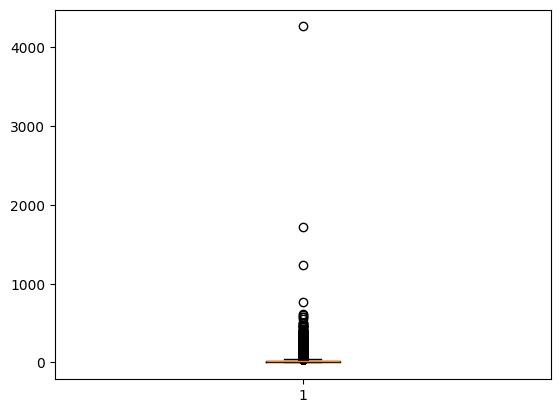

In [24]:
#Graphical Repersentaion of outliar
plt.boxplot(df["fare_amount"])
plt.show()

In [25]:
#Removing the outlier using inter quartile range concept
col=["duration","trip_distance","fare_amount"]
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df=df[(df[i]<=ub) & (df[i]>=lb)]

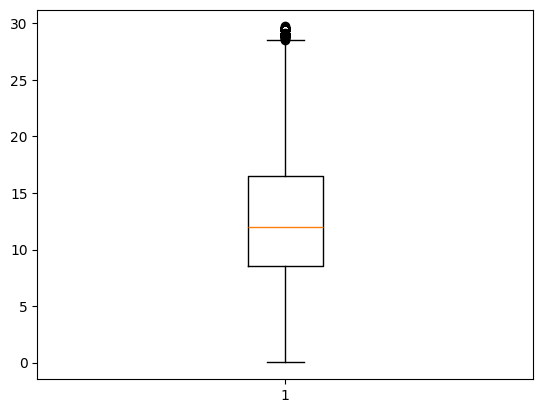

In [26]:
#Graphical Repersentaion after removing the outliar from the fare amount
plt.boxplot(df["fare_amount"])
plt.show()

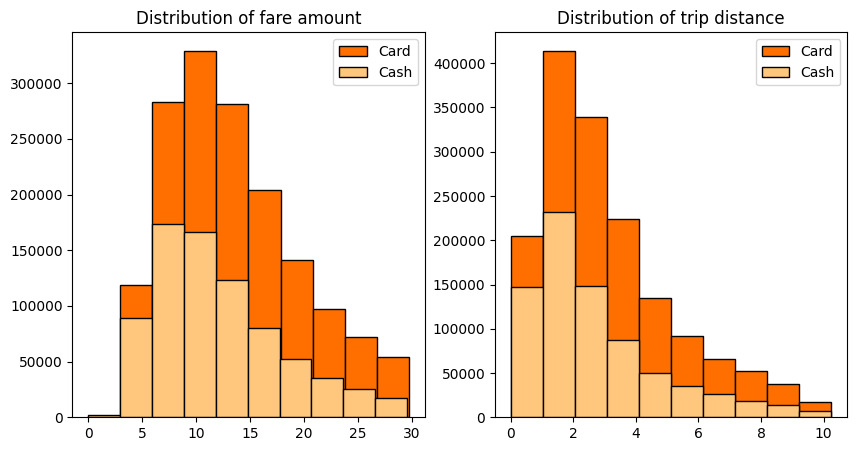

In [27]:
#Plot the Histogram for the Disrtribution of fare amount & Distribution of trip distance according to the payment type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df[df["payment_type"]=="Card"]["fare_amount"],edgecolor="black", 
         color="#FF6F00",label="Card")
plt.hist(df[df["payment_type"]=="Cash"]["fare_amount"],edgecolor="black",
         color="#FFC77D",label="Cash")
plt.legend()
plt.title("Distribution of fare amount")
plt.subplot(1,2,2)
plt.hist(df[df["payment_type"]=="Card"]["trip_distance"],edgecolor="black",
         color="#FF6F00",label="Card")
plt.hist(df[df["payment_type"]=="Cash"]["trip_distance"],edgecolor="black",
         color="#FFC77D",label="Cash")
plt.legend()
plt.title("Distribution of trip distance")
plt.show()

In [28]:
#Show the Stastical Repersentation of the Above Distribution
df.groupby("payment_type").agg({"fare_amount": ["mean","std"],"trip_distance":["mean","std"]})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.419372  6.135066      3.102735  2.129750
Cash           12.026761  5.912055      2.701996  2.057393

In [29]:
val=[df["payment_type"].where(df["payment_type"]=="Card").count(),
     df["payment_type"].where(df["payment_type"]=="Cash").count()]
val

[1582323, 764656]

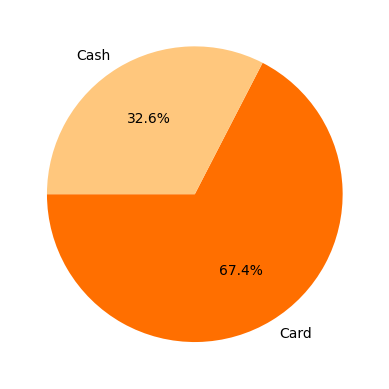

In [30]:
#To show the %age of Payment Type made
plt.pie(val,labels=["Card","Cash"],colors=["#FF6F00","#FFC77D"]
        , startangle=180, autopct="%1.1f%%")
plt.show()

In [31]:
#New dataframe which contain Only Passenger Count & Payment Columns
df2=pd.DataFrame(df.iloc[:,[1,4]])
df2

,passenger_count,payment_type
0,1,Card
1,1,Card
2,1,Card
3,1,Card
5,1,Cash
...,...,...
6339550,4,Card
6339555,3,Card
6339561,1,Card
6339563,1,Card


In [32]:
#Create a New DataFrame to make  the table of %age count of Different Passenger Count according to the Payment type 
df3=pd.DataFrame({"Payment_type":["Card","Cash"]})

In [33]:
#insert %age value in the created DataFrame
c=df["passenger_count"].unique()
for i in c:
    a=(df2["payment_type"].where((df2["payment_type"]=="Card") & 
                                 (df2["passenger_count"]==i)).count()/
        df2["payment_type"].count())*100
    b=(df2["payment_type"].where((df2["payment_type"]=="Cash") & 
                                 (df2["passenger_count"]==i)).count()/
        df2["payment_type"].count())*100
    df3[i]=[a,b]

df3

,Payment_type,1,2,3,4,5
0,Card,39.875176,14.188623,5.273290,2.739479,5.342996
1,Cash,20.050329,6.723111,2.350937,1.406020,2.050040


In [34]:
df3.to_csv(r"C:\Users\ASUS\Desktop\taxi_stacked_chart.csv") #To make the visulization In PowerBI, for more detail

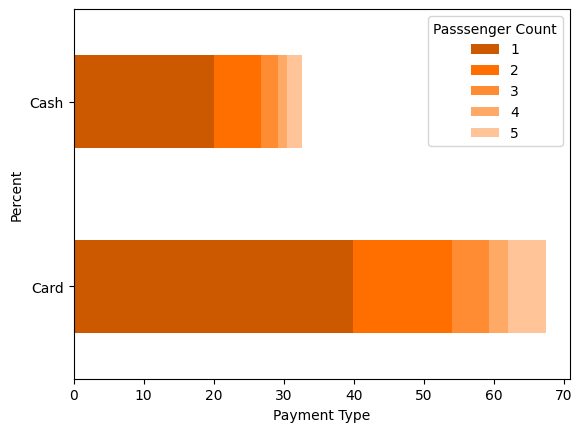

In [35]:
#show the percentage of different passenger count related to payment type
df3.plot(kind="barh",x="Payment_type",stacked=True,
         color=["#cc5900","#ff6f00","#ff8c33","#ffa966","#ffc599"],
         ylabel="Percent",xlabel="Payment Type")
plt.legend(title="Passsenger Count")
plt.show()

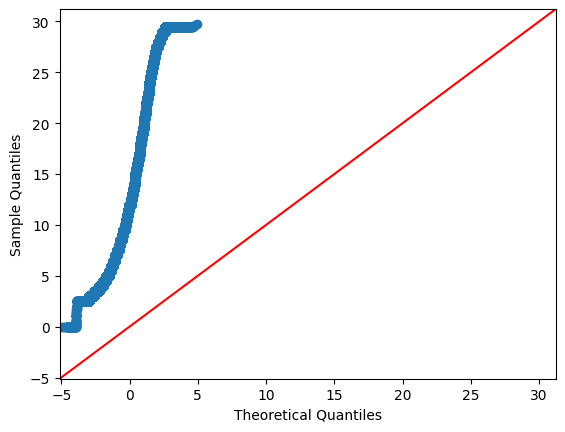

In [36]:
#cheak for the noraml distribution
sm.qqplot(df["fare_amount"],line="45")
plt.show()

In [37]:
#Will use t-test as distribution is not normal
#Create Sample
cards=df[df["payment_type"]=="Card"]["fare_amount"]
cashs=df[df["payment_type"]=="Cash"]["fare_amount"]

In [38]:
#Null Hypothesis is "There is no difference in Payment Type due to fare amount"
#Alternate Hypothesis is" There is difference in Payment Type due to Fare amount"
t_score,p_score=st.ttest_ind(a=cards,b=cashs)
print("T-Test Score: ",t_score," ","P-Score: ",p_score)

if p_score<0.05: #0.05 means the level of significance 5%
    print("Reject Null Hypothesis")
else:
    print("Reject Null Hypothesis")

T-Test Score:  164.90973651399472   P-Score:  0.0
Reject Null Hypothesis


In conclusion:
1. There is a significant difference in the fare amount between passengers who chose to pay by credit card or cash, as indicated by the P-score.
2. To maximize revenue, drivers should encourage more payments through cards rather than cash, as the average fare amount for card payments is notably higher than for cash payments.